## MULTIPLE LINEAR REGRESSION  : House Price Prediction

#### Importing libraries

In [10]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm


#### Loading and analyzing data

In [11]:
california = fetch_california_housing()

In [12]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [13]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [14]:
california.target_names

['MedHouseVal']

In [15]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [16]:
# no of rows and column in california data
california.data.shape

(20640, 8)

In [17]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

#### Converting into DataFrame 

In [18]:
df = pd.DataFrame(california.data,columns = california.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
# include the independant feature (Target into the data frame)
df['Price'] = california.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Basic information about dataframe

In [20]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
# Check the shape of the dataset (number of rows and columns)
df.shape

(20640, 9)

In [22]:
# Summary statistics for numerical columns
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### Data cleaning

##### handle missing value

In [23]:
# Check for missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

##### drop duplicates

In [24]:
# Check for duplicate rows and drop
df.duplicated().sum()

0

##### Outlier Detection

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

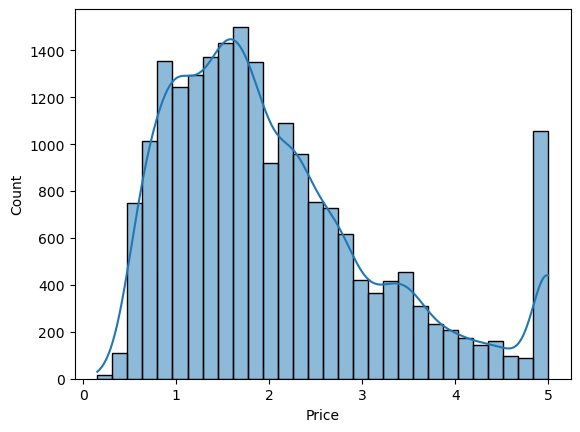

In [25]:
# outlier detection using histogram

sns.histplot(df['Price'],bins = 30,kde = True)

###### NOTE : Histplot shows that data has skewed distribution and outliers .

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_log', ylabel='Count'>

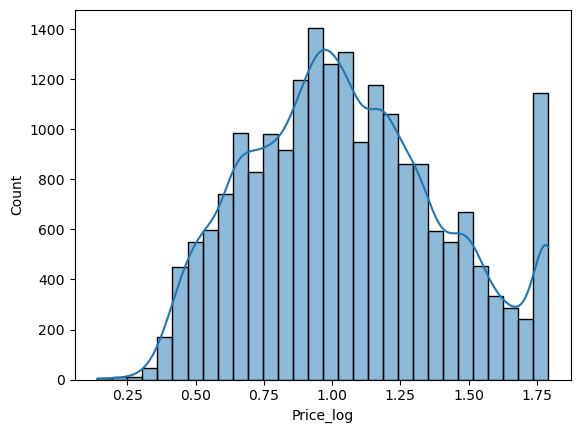

In [26]:
# Applying log transformation to avoid skewness

df['Price_log'] = np.log(df['Price'] +1  )
sns.histplot(df['Price_log'],bins = 30,kde = True)

In [27]:
# Outlier Detection for all numerical features

numerical_features = df.select_dtypes(include = ['float64','int64']).columns
numerical_features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price', 'Price_log'],
      dtype='object')

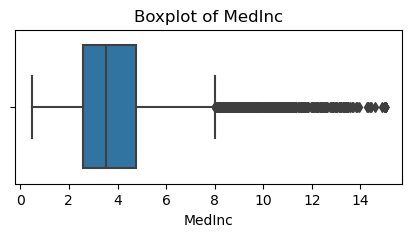

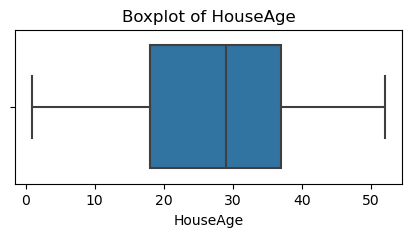

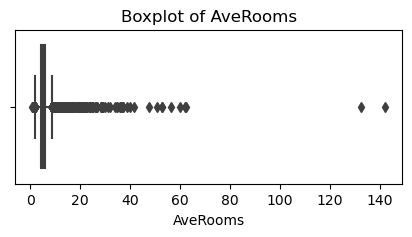

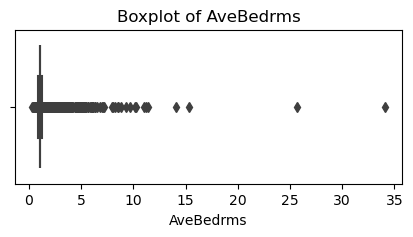

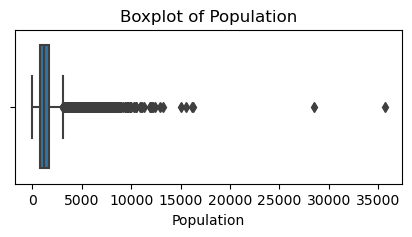

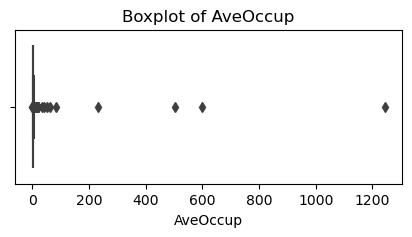

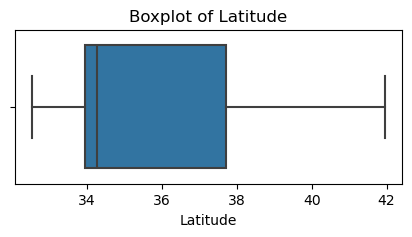

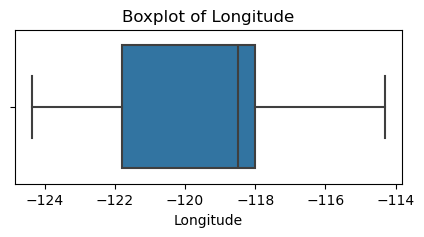

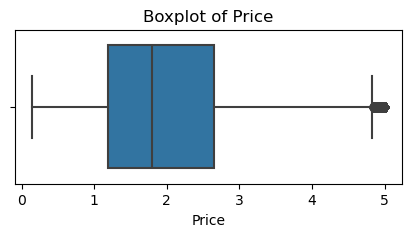

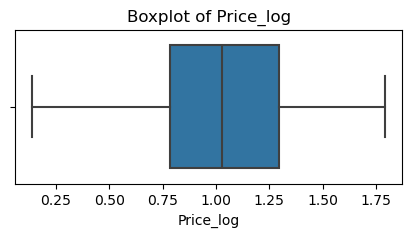

In [28]:
for feature in numerical_features :
    plt.figure(figsize = (5,2))
    sns.boxplot(x = df[feature])
    plt.title(f'Boxplot of {feature}')

###### NOTE : Box plot show that Median Income has some significant outlier

In [30]:
# Handle Outliers based in IQR for all features

for feature in numerical_features :
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    # df = df[(df[feature]>=lower_fence) & (df[feature]<= upper_fence)]  
    df[feature] = df[feature].apply(lambda x : lower_fence if x < lower_fence else upper_fence if x > upper_fence else x) # capping outliers

##### NOTE :  IQR method is quite strict in detecting outliers, so it can result in the removal of many rows.So cap outliers instead of removing them

In [31]:
df.shape

(20640, 10)

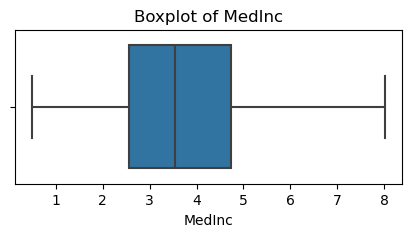

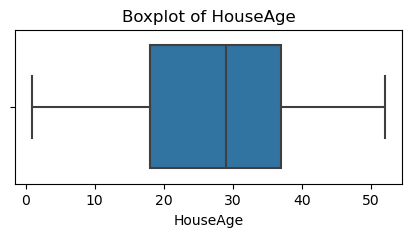

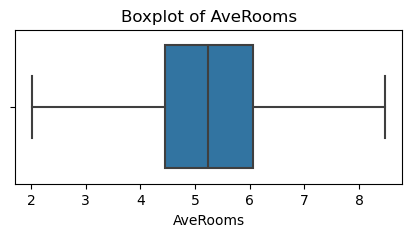

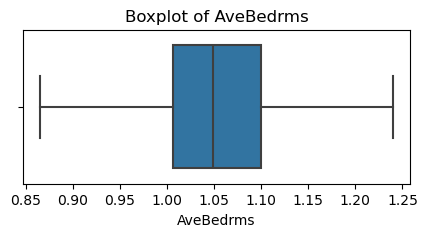

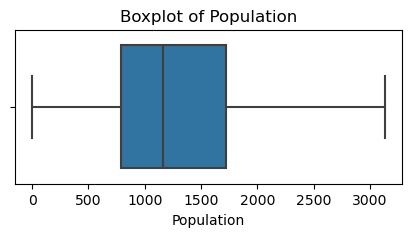

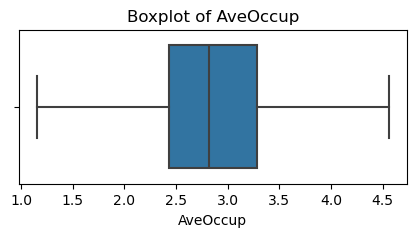

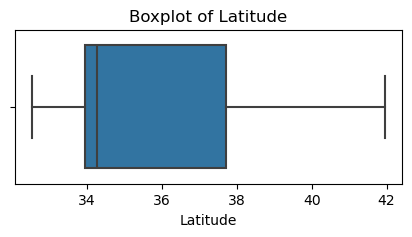

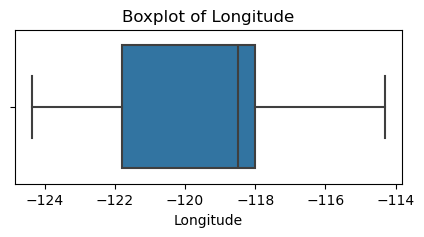

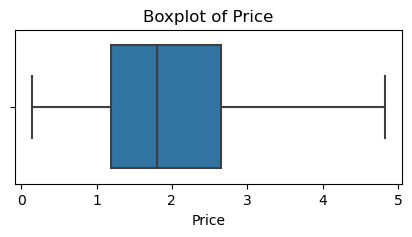

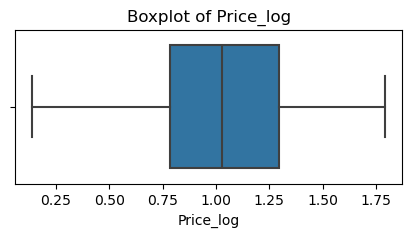

In [32]:
for feature in numerical_features :
    plt.figure(figsize = (5,2))
    sns.boxplot(x = df[feature])
    plt.title(f'Boxplot of {feature}')

##### NOTE : outliers of all features is handled

In [33]:
# droping price column and keeping only logged price
df.drop('Price',axis = 1,inplace = True)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price_log
0,8.013025,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1.709464
1,8.013025,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1.522790
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1.508733
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1.484555
4,3.846200,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.486592


#### Explore relationships between the features and the target variable 

##### correlation matrix

<Axes: >

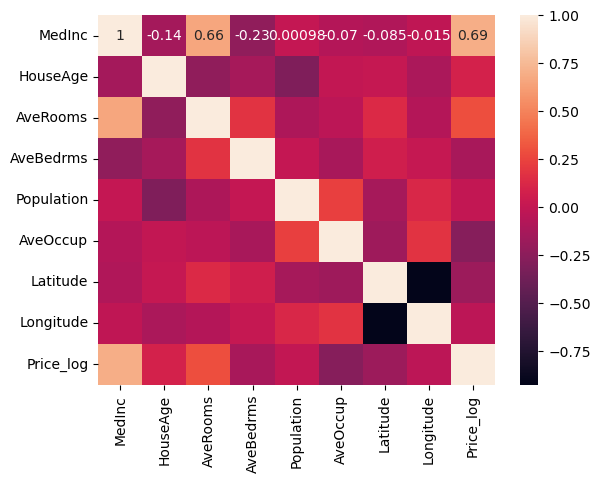

In [34]:
# heatmap of correlation
sns.heatmap(df.corr(),annot = True)

In [35]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price_log
MedInc,1.000000,-0.142435,0.657482,-0.227488,0.000984,-0.069799,-0.084654,-0.015461,0.693296
HouseAge,-0.142435,1.000000,-0.230360,-0.132477,-0.307620,-0.006318,0.011173,-0.108197,0.088588
AveRooms,0.657482,-0.230360,1.000000,0.176210,-0.097907,-0.035624,0.128647,-0.068379,0.288095
AveBedrms,-0.227488,-0.132477,0.176210,1.000000,0.002474,-0.121060,0.063221,0.011850,-0.121178
Population,0.000984,-0.307620,-0.097907,0.002474,1.000000,0.225746,-0.133225,0.116115,-0.003520
AveOccup,-0.069799,-0.006318,-0.035624,-0.121060,0.225746,1.000000,-0.170149,0.178649,-0.272408
Latitude,-0.084654,0.011173,0.128647,0.063221,-0.133225,-0.170149,1.000000,-0.924664,-0.175914
Longitude,-0.015461,-0.108197,-0.068379,0.011850,0.116115,0.178649,-0.924664,1.000000,-0.033463
Price_log,0.693296,0.088588,0.288095,-0.121178,-0.003520,-0.272408,-0.175914,-0.033463,1.000000


##### Feature Distribution

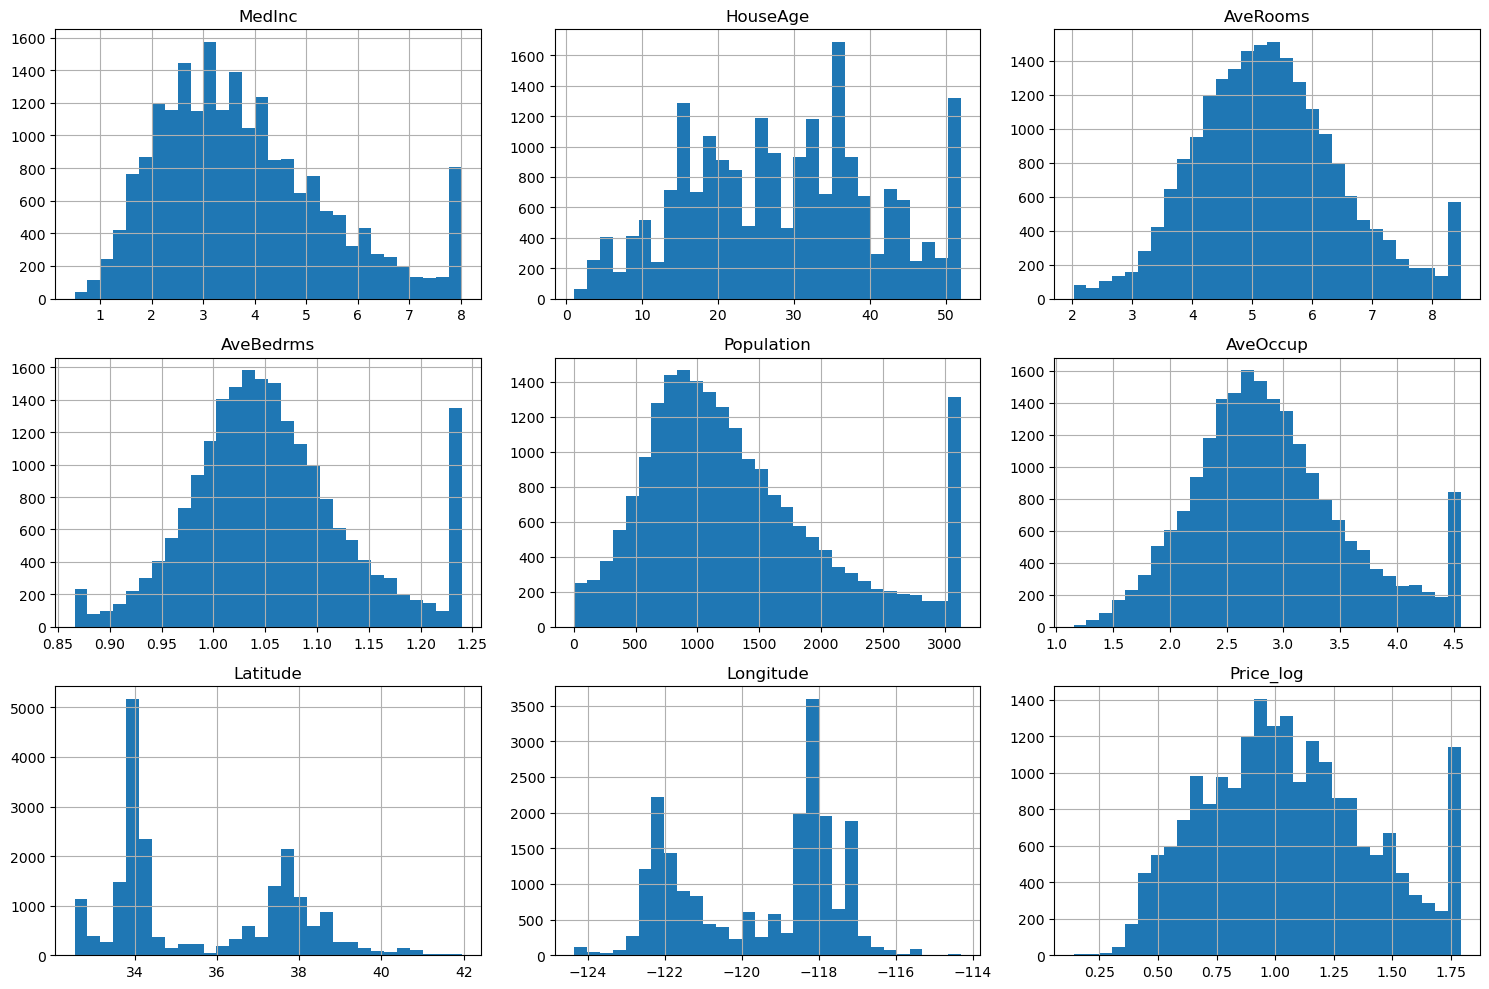

In [36]:
df.hist(bins = 30,figsize = (15,10))
plt.tight_layout()

#### Splitting data into dependant and independant Features

In [37]:
X = df.drop(['Price_log'],axis = 1) #dependant
y = df['Price_log'] # Independant

In [38]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.013025,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.013025,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.846200,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [39]:
y.head()

0    1.709464
1    1.522790
2    1.508733
3    1.484555
4    1.486592
Name: Price_log, dtype: float64

#### Train Test Split

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [86]:
X_train.shape

(16512, 8)

In [87]:
X_test.shape

(4128, 8)

In [88]:
y_train.shape

(16512,)

In [89]:
y_test.shape

(4128,)

#### Standardization of Features

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
X_train

array([[-0.7696031 , -0.60284716,  0.47804751, ..., -1.17080838,
        -0.85071881,  1.52346202],
       [-0.7029407 ,  1.37738127,  0.74281774, ..., -1.00377036,
         1.33721733, -1.6764423 ],
       [ 0.82075419,  0.18924421, -0.21439575, ..., -0.74791432,
         0.93048561, -1.45214994],
       ...,
       [ 1.04936277, -1.79098421, -0.31453466, ...,  1.18352502,
         0.78555822, -1.10325072],
       [-0.95998949,  0.50608076, -2.03677614, ...,  2.09202215,
        -0.77591757,  0.67115105],
       [-0.67594967, -0.99889284, -1.0749669 , ..., -0.63763541,
         0.77620806, -1.14810919]])

In [92]:
X_test

array([[ 0.89520596, -1.31572939, -0.66532886, ...,  1.49338612,
        -0.69176618,  0.19764496],
       [ 0.10654863, -0.12759233, -0.54295705, ..., -1.0027259 ,
         0.893085  , -1.362433  ],
       [ 0.43092403, -1.31572939, -0.69698066, ..., -1.36362103,
        -0.92084497,  0.90042769],
       ...,
       [ 0.10962814,  0.34766249, -0.46521808, ...,  0.39298106,
         1.09411332, -1.37738582],
       [-1.72817711,  1.29817213, -0.46865073, ...,  1.2826717 ,
        -0.77591757,  0.64622968],
       [ 2.44051782,  0.90212645,  1.03366499, ..., -0.26084675,
        -0.6683908 ,  0.68610388]])

#### Model Training 

In [93]:
lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

In [94]:
# slope
lr_model.coef_

array([ 0.25202133,  0.04110481, -0.04131827,  0.04127448,  0.01752573,
       -0.08166683, -0.31579066, -0.28596348])

In [95]:
lr_model.intercept_

1.0550953853785598

#### Model Prediction

In [96]:
y_pred = lr_model.predict(X_test)
y_pred

array([1.23292709, 1.32066843, 1.31373757, ..., 1.08255982, 0.69081882,
       1.66338556])

#### Perfomance Analysis

In [97]:
mse_test = mean_squared_error(y_test,y_pred)
mae_test = mean_absolute_error(y_test,y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))

In [98]:
mse_test

0.03923641616568234

In [99]:
mae_test

0.14789085829242457

In [100]:
rmse_test

0.19808184208978455

In [101]:
 # R square and adj R square
score = r2_score(y_test,y_pred)
score

0.6953110574085966

##### NOTE :  R² value of 0.695 indicates that approximately 69.5% of the variance in housing prices is explained by the model

#### Assumptions Check

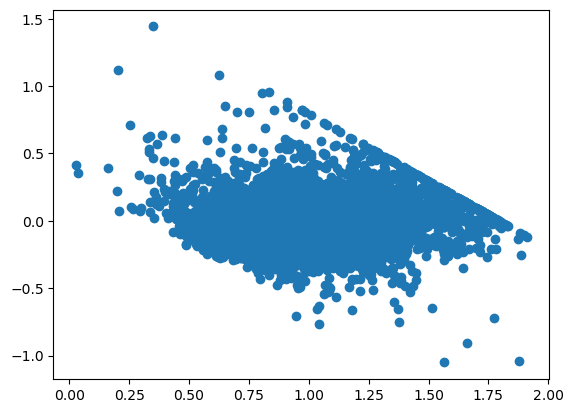

In [102]:
# Linearity : Scatter plot of residuals vs predicted values should not follow a patter

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)


##### `NOTE : scatter plot of residuals versus predicted values should not follow any pattern (randomly scattered around the horizontal line (y=0))

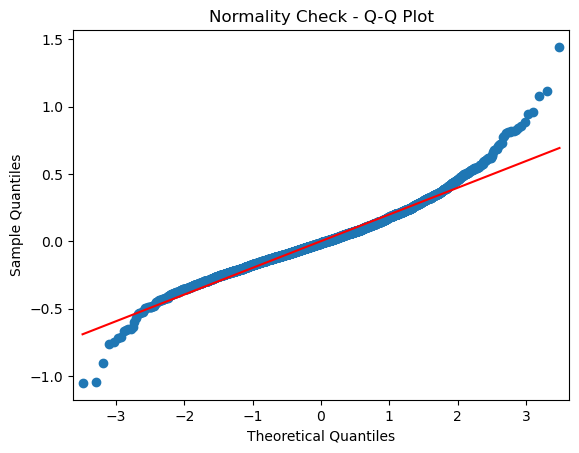

In [103]:
#  Normality of residuals (Q-Q plot)
sm.qqplot(residuals, line='s')
plt.title('Normality Check - Q-Q Plot')
plt.show()


##### NOTE : Q-Q Plot  Points should fall approximately along the 45-degree reference line.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


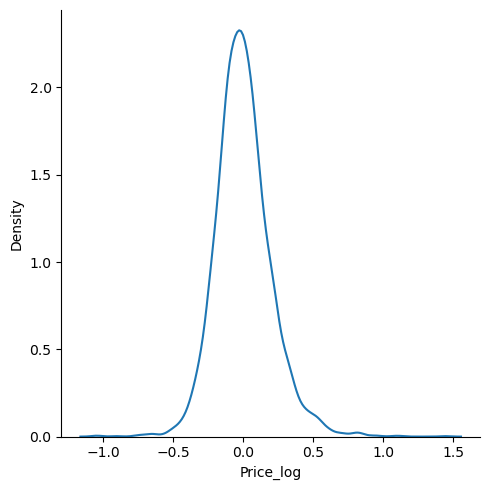

In [104]:
# KDE Plot for Residuals
sns.displot(residuals,kind = 'kde')

##### NOTE :  If the KDE plot resembles a bell-shaped curve centered around zero, this suggests that the residuals are normally distributed

### CONCLUSION

#### Overall, the model performs moderately well , But there is still need for Improvement